In [1]:
import numpy as np
import pandas as pd
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [6]:
# fetching data
DATA_DIR = 'Data'
CLASSES = os.listdir(DATA_DIR)
NUM_CLASSES = len(CLASSES)
# defining traning parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 10
print(CLASSES)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


DATA SPLITTING

In [4]:
# splitting folder to training data
train_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=456,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    class_names=CLASSES
)
# splitting folder to testing data
val_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=456,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    class_names=CLASSES
)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.
Found 4188 files belonging to 4 classes.
Using 837 files for validation.


DATA EXPLORATION

In [15]:
# obtain individual paths to classes
bl  = 'Data/Blight'
hl = 'Data/Healthy'
rus = 'Data/Common_Rust'
gr = 'Data/Gray_Leaf_Spot'
print(len(os.listdir(rus)))

1306


In [17]:
# create array with length of classes
posts = []
posts.append(len(os.listdir(bl)))
posts.append(len(os.listdir(hl)))
posts.append(len(os.listdir(rus)))
posts.append(len(os.listdir(gr)))
posts

[1146, 1162, 1306, 574]

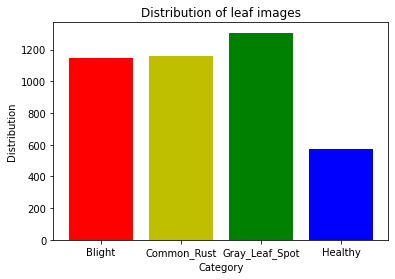

In [27]:
# barchart to represent distribution of images
from matplotlib import pyplot as plt
plt.bar(CLASSES, posts,color=['r', 'y', 'g', 'b'])
plt.title('Distribution of leaf images')
plt.xlabel('Category', fontsize=10)
plt.ylabel('Distribution', fontsize=10)
plt.show()

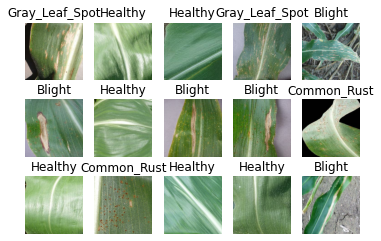

In [28]:
# sample images
import matplotlib.pyplot as plt
plt.figure()
for images, labels in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(CLASSES[np.argmax(labels[i])])
        plt.axis("off")
plt.show()

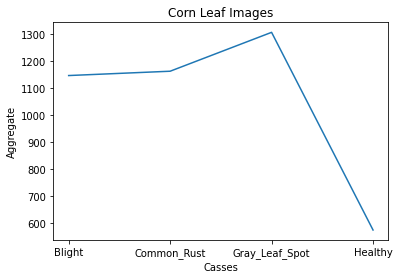

In [29]:
plt.plot(CLASSES, posts)
plt.title('Corn Leaf Images')
plt.xlabel('Casses',fontsize = 10)
plt.ylabel('Aggregate',fontsize = 10)
plt.show()

MODEL COMPILATION

In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet50, ResNet101, 
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

In [18]:
# obtain ResNet50 pre-trained model (Transfer learning)
resnet = ResNet50( weights="imagenet", include_top=False)
resnet.trainable = False
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
resnet_predictions = Dense(len(CLASSES), activation='softmax')(x)
resnet_model = Model(inputs=resnet.input, outputs=resnet_predictions)
for layer in resnet.layers:
    layer.trainable = False
resnet_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=["accuracy"])

94765736/94765736 [==============================] - 28s 0us/step


In [19]:
# fit resNet50 model with validation data
history = resnet_model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
210/210 [==============================] - 444s 2s/step - loss: 0.4227 - accuracy: 0.8648 - val_loss: 0.2607 - val_accuracy: 0.9164
Epoch 2/10
210/210 [==============================] - 419s 2s/step - loss: 0.2651 - accuracy: 0.9102 - val_loss: 0.2060 - val_accuracy: 0.9331
Epoch 3/10
210/210 [==============================] - 418s 2s/step - loss: 0.2085 - accuracy: 0.9335 - val_loss: 0.1945 - val_accuracy: 0.9462
Epoch 4/10
210/210 [==============================] - 426s 2s/step - loss: 0.1982 - accuracy: 0.9332 - val_loss: 0.1840 - val_accuracy: 0.9367
Epoch 5/10
210/210 [==============================] - 458s 2s/step - loss: 0.1589 - accuracy: 0.9442 - val_loss: 0.1639 - val_accuracy: 0.9450
Epoch 6/10
210/210 [==============================] - 469s 2s/step - loss: 0.1288 - accuracy: 0.9567 - val_loss: 0.2152 - val_accuracy: 0.9271
Epoch 7/10
210/210 [==============================] - 461s 2s/step - loss: 0.0943 - accuracy: 0.9672 - val_loss: 0.1931 - val_accuracy: 0.9355

In [20]:
# obtain ResNet101 pre-trained model (Transfer learning)
RN101_model = ResNet101( weights='imagenet', include_top=False)
RN101_model.trainable = False
x = RN101_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
RN101_predictions = Dense(len(CLASSES), activation='softmax')(x)
model_RN101 = Model(inputs=RN101_model.input, outputs=RN101_predictions)
for layer in RN101_model.layers:
    layer.trainable = False
model_RN101.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=["accuracy"],)

171446536/171446536 [==============================] - 63s 0us/step


In [22]:
# fit resNet50 model with validation data
RN101_history = model_RN101.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
210/210 [==============================] - 734s 3s/step - loss: 0.3051 - accuracy: 0.8962 - val_loss: 0.2608 - val_accuracy: 0.9176
Epoch 2/10
210/210 [==============================] - 733s 3s/step - loss: 0.2245 - accuracy: 0.9182 - val_loss: 0.1837 - val_accuracy: 0.9295
Epoch 3/10
210/210 [==============================] - 733s 3s/step - loss: 0.1850 - accuracy: 0.9385 - val_loss: 0.1715 - val_accuracy: 0.9355
Epoch 4/10
210/210 [==============================] - 732s 3s/step - loss: 0.1653 - accuracy: 0.9451 - val_loss: 0.2188 - val_accuracy: 0.9391
Epoch 5/10
210/210 [==============================] - 731s 3s/step - loss: 0.1262 - accuracy: 0.9540 - val_loss: 0.1816 - val_accuracy: 0.9403
Epoch 6/10
210/210 [==============================] - 727s 3s/step - loss: 0.1191 - accuracy: 0.9591 - val_loss: 0.2197 - val_accuracy: 0.9403
Epoch 7/10
210/210 [==============================] - 734s 3s/step - loss: 0.0976 - accuracy: 0.9666 - val_loss: 0.2152 - val_accuracy: 0.9343

In [26]:
from tensorflow.keras.applications import Xception
# obtain Xception pre-trained model(Transfer learning)
Xception_model = Xception(include_top=False, weights="imagenet")
Xception_model.trainable = True
x = Xception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
Xception_predictions = Dense(len(CLASSES), activation="softmax")(x)
model_Xception = Model(inputs=Xception_model.input, outputs=Xception_predictions)
for layer in Xception_model.layers:
    layer.trainable = False    
model_Xception.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [27]:
# fit Xception model with validation data
Xception_history = model_Xception.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
210/210 [==============================] - 449s 2s/step - loss: 0.7775 - accuracy: 0.7007 - val_loss: 0.5734 - val_accuracy: 0.7634
Epoch 2/10
210/210 [==============================] - 443s 2s/step - loss: 0.6007 - accuracy: 0.7672 - val_loss: 0.5198 - val_accuracy: 0.7957
Epoch 3/10
210/210 [==============================] - 443s 2s/step - loss: 0.5244 - accuracy: 0.7980 - val_loss: 0.5033 - val_accuracy: 0.8029
Epoch 4/10
210/210 [==============================] - 445s 2s/step - loss: 0.5103 - accuracy: 0.8063 - val_loss: 0.5303 - val_accuracy: 0.7742
Epoch 5/10
210/210 [==============================] - 445s 2s/step - loss: 0.5014 - accuracy: 0.8114 - val_loss: 0.5113 - val_accuracy: 0.8029
Epoch 6/10
210/210 [==============================] - 447s 2s/step - loss: 0.4638 - accuracy: 0.8251 - val_loss: 0.4719 - val_accuracy: 0.8029
Epoch 7/10
210/210 [==============================] - 447s 2s/step - loss: 0.4769 - accuracy: 0.8186 - val_loss: 0.4837 - val_accuracy: 0.8100

OBTAINED RESULTS

In [46]:
# store losses and obtained accuracies in array
accuracies = []
losses = []
for i in range(0, len(model_histories)):
    accuracies.append(np.mean(model_histories[i].history['accuracy']))
    losses.append(np.mean(model_histories[i].history['loss']))
    # view 
print(accuracies)
print(losses)

[0.9421963632106781, 0.9497761785984039, 0.8032229125499726]
[0.1732975199818611, 0.14722177907824516, 0.5167869359254837]
